In [236]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [237]:
df = pd.read_csv('housing_cleaned.csv')
df2 = pd.read_csv('housing_cleaned.csv')

In [238]:
df2 = df2[df2["Size(sqft)"].str.contains("N/A") == False]
df2 = df2[df2["Size(sqft)"].str.contains("Limited") == False]
df2= df2[df2["Bedrooms"].str.contains("5+") == False]
df = df[df["Bedrooms"].str.contains("5+") == False]
df2['Bedrooms'] = df2["Bedrooms"].astype(float)
df2['Bathrooms'] = df2["Bathrooms"].astype(float)
df['Bedrooms'] = df["Bedrooms"].astype(float)
df['Bathrooms'] = df["Bathrooms"].astype(float)
df2['Size(sqft)'] = df2["Size(sqft)"].astype(float)

In [239]:
status = pd.get_dummies(df2['Location'], dtype = int)
status3 = pd.get_dummies(df2['Style'], dtype = int)

df2 = pd.concat([df2, status, status3,], axis = 1)

df2.drop(columns='Location',inplace=True)
df2.drop(columns='Den',inplace=True)
df2.drop(columns='Bachelor/Studio',inplace=True)
df2.drop(columns='Style',inplace=True)
df2.drop(columns='Air Conditioned  ',inplace=True)
df2.drop(columns = 'Title', inplace = True)

In [240]:
df2 = df2[df2['Size(sqft)'] > 50]
df2 = df2[df2['Size(sqft)'] < 3600]
df2 = df2[df2['Price'] > 1250]




In [241]:
numeric_cols = df2.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print(corr['Price'].sort_values(ascending = False), '\n')

Price              1.000000
Size(sqft)         0.601741
Bedrooms           0.586226
Bathrooms          0.507180
 House             0.343329
Toronto            0.202376
Kitchener          0.117977
 Condo             0.105655
Unnamed: 0         0.048087
 Townhouse         0.044398
Guelph             0.004285
London            -0.020289
 Duplex/Triplex   -0.044215
 Apartment        -0.079342
Hamilton          -0.080098
Ottawa            -0.209750
 Basement         -0.224784
Name: Price, dtype: float64 



In [242]:
df_model = df2

#Get dummy data
df_dum = pd.get_dummies(df_model, dtype = int)

In [243]:
#Train test split
X = df_dum.drop('Price', axis =1)
y = df_dum['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Price')

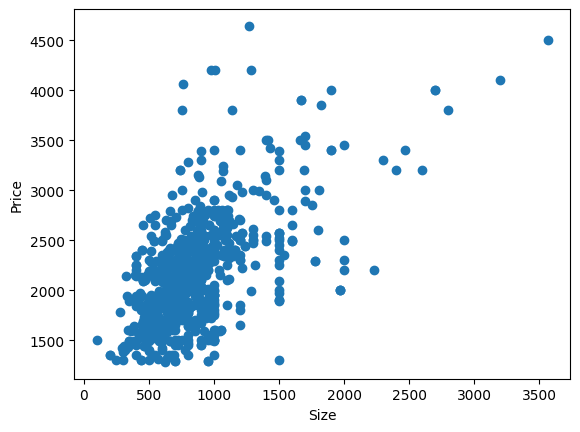

In [244]:
plt.scatter(x = df2['Size(sqft)'], y = df2['Price'])
plt.xlabel('Size')
plt.ylabel('Price')

In [245]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predicitions = model.predict(X_test)
model.score(X_test, y_test)

0.6851895899507088

In [246]:

y_test[:10]

1046    2495
1008    2499
77      2494
791     1550
80      2282
937     2459
489     1799
724     1440
1128    2098
684     1976
Name: Price, dtype: int64

In [247]:
model.predict(X_test[:10])

array([2057.67958079, 2290.1767155 , 2312.01486914, 1508.58952726,
       2007.69180931, 2100.49406205, 1876.62608828, 1507.58891212,
       2271.85857311, 2096.0605948 ])

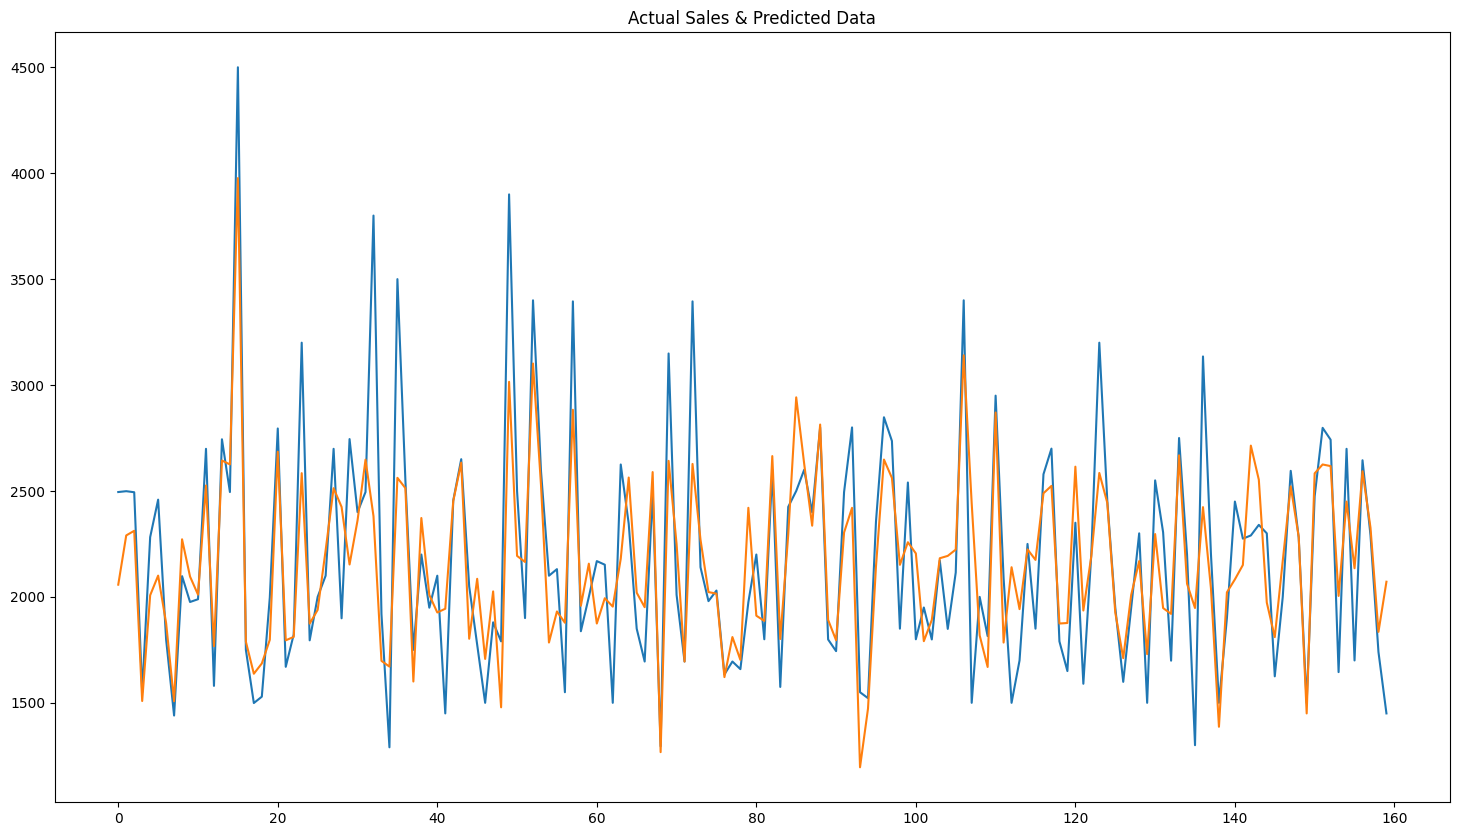

In [248]:
plt.figure(figsize=(18,10))
x_ax = range(len(y_test)) 
plt.plot(x_ax, y_test, label = "original")
plt.plot(x_ax, predicitions, label = "predicted")
plt.title("Actual Sales & Predicted Data")
plt.legend
plt.show()